In [6]:
import pandas as pd
import os
import csv
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# FUNCTIONS FOR CORRELATION ANALYSIS

In [7]:
def corr_analysis(file_path):
    # Load the data into a dataframe
    # Replace 'your_data.csv' with your actual data file name
    df = pd.read_csv(file_path)

    # Perform correlation analysis
    corr_matrix = df.corr()  # Compute correlation matrix
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Create heatmap

    # Create scatter plots for each dependent variable against the independent variable
    dependent_vars = ['length', 'width', 'diameter', 'area', 'perimeter', 'rectangularity',
                      'circularity', 'ellipticity', 'aspect ratio', 'form factor', 'narrow factor',
                      'perimeter ratio of diameter', 'perimeter Ratio of Physiological Length and Physiological Width',
                      'Texture']

    independent_var = 'Species'
    for var in dependent_vars:
        sns.barplot(x=independent_var, y=var, data=df)
        plt.xlabel(independent_var)
        plt.ylabel(var)
        plt.title(f'Scatter plot of {var} vs. {independent_var}')
        plt.show()


def find_variable_impact(file_path):

    # Load the data into a dataframe
    # Replace 'your_data.csv' with your actual data file name
    df = pd.read_csv(file_path)

    # Prepare the data for regression analysis
    X = df[['length', 'width', 'diameter', 'area', 'perimeter', 'rectangularity',
                      'circularity', 'ellipticity', 'aspect ratio', 'form factor', 'narrow factor',
                      'perimeter ratio of diameter', 'perimeter Ratio of Physiological Length and Physiological Width',
                      'Texture']]  # Independent variables
    y = df['Species']  # Dependent variable

    # Add a constant term to the independent variables
    X = sm.add_constant(X)

    # Fit the multiple linear regression model
    model = sm.OLS(y, X).fit()

    # Get the coefficients (impact) of each dependent variable
    coefficients = model.params[1:]

    # Sort the coefficients by absolute values to identify the variables with the most impact
    sorted_coefficients = coefficients.abs().sort_values(ascending=False)

    # Print the sorted coefficients
    print("Dependent variables sorted by impact on the independent variable:")
    print(sorted_coefficients)


def corr(file_path):
    corr_analysis(file_path)
    find_variable_impact(file_path)

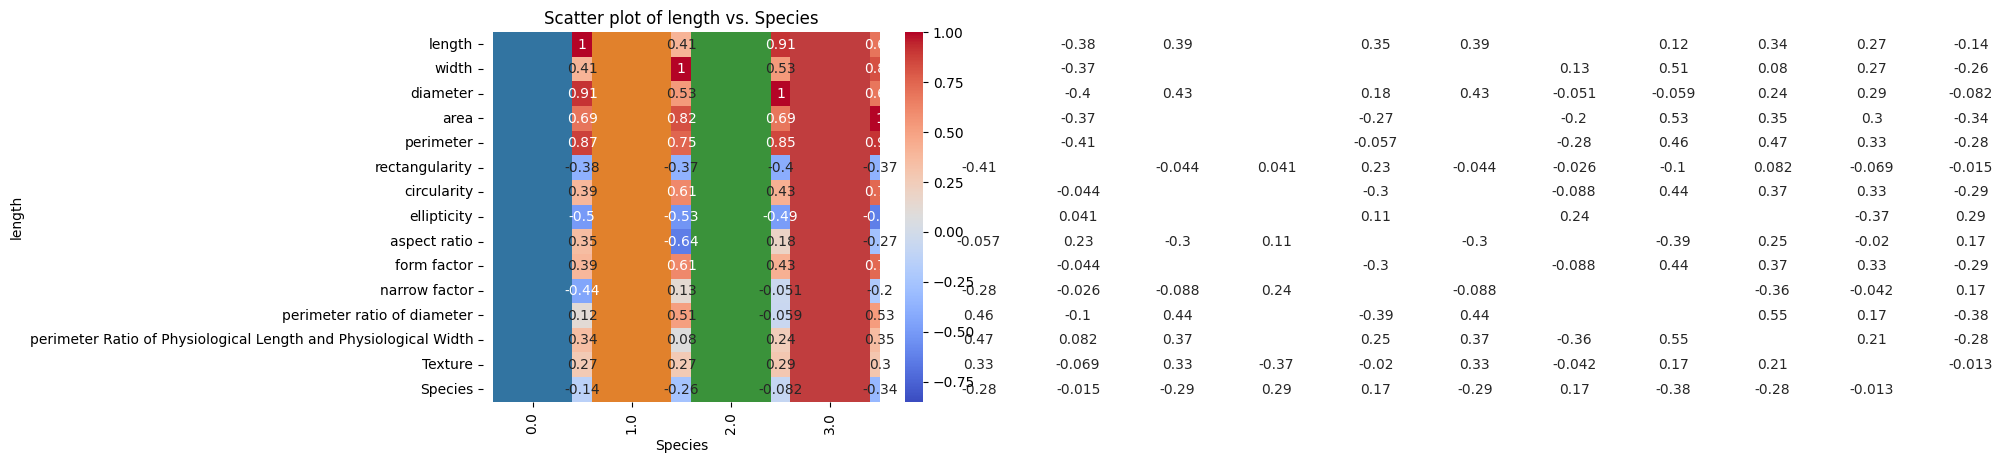

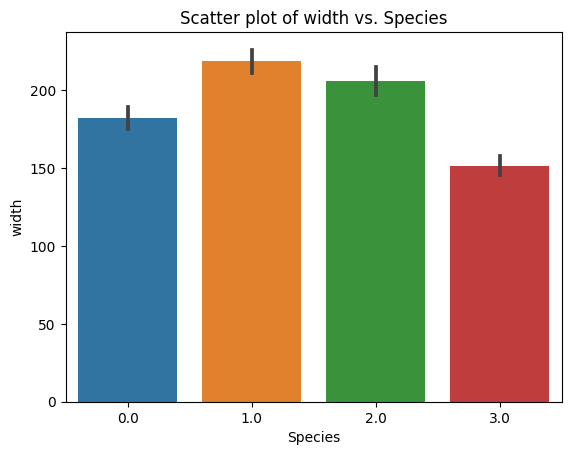

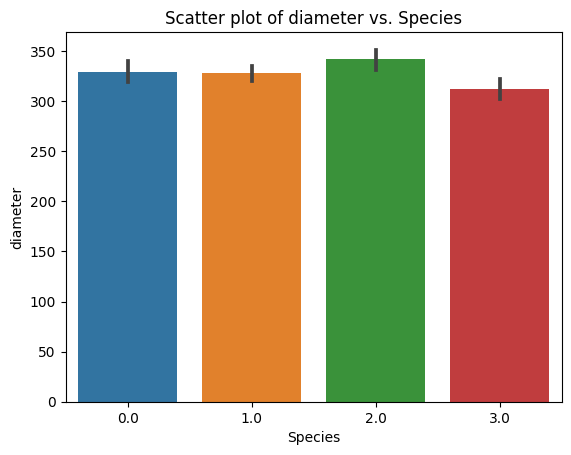

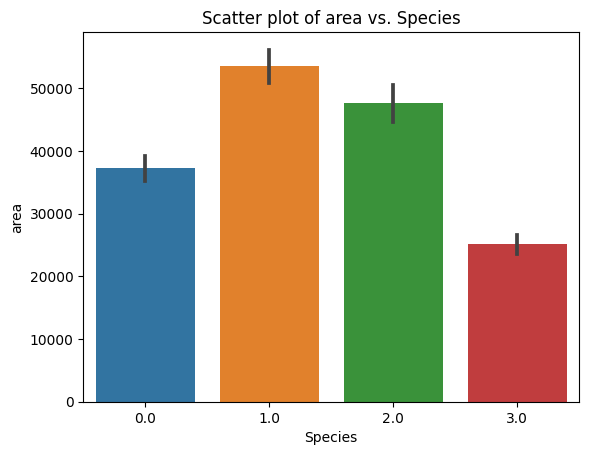

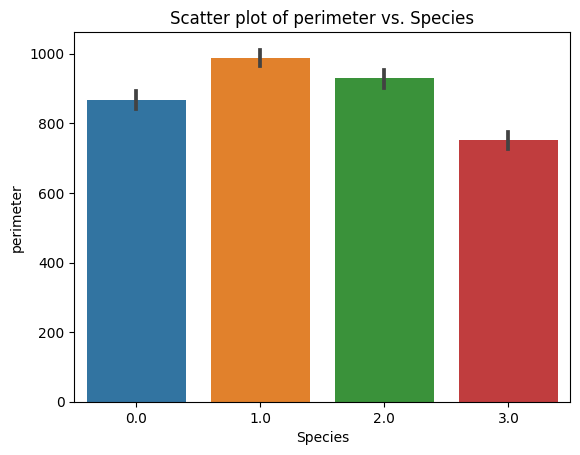

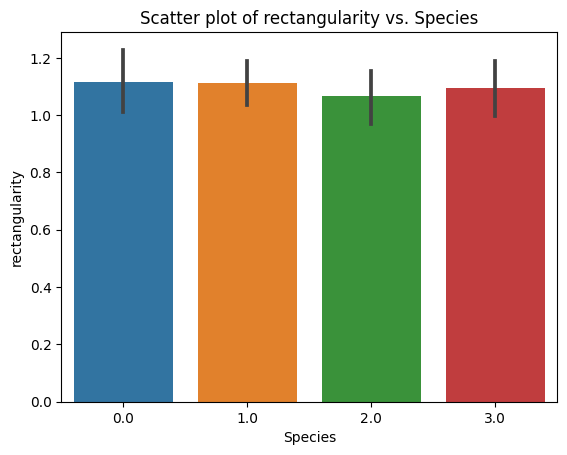

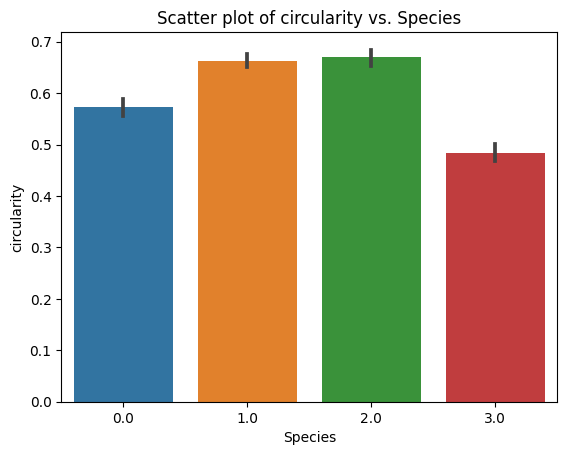

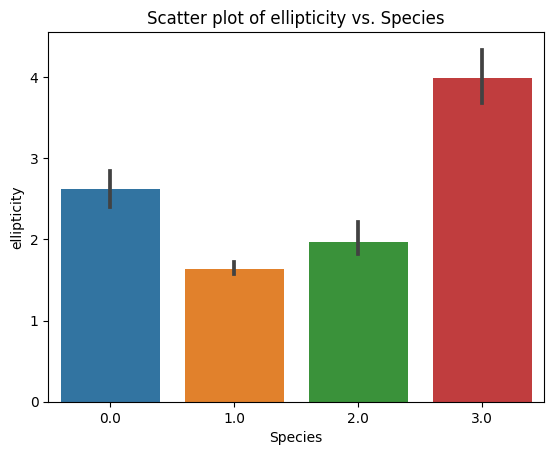

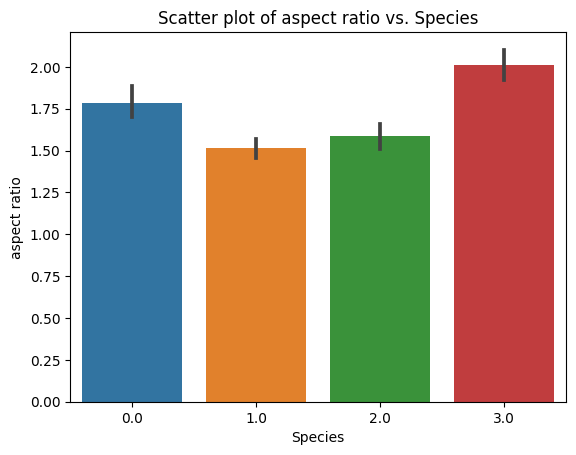

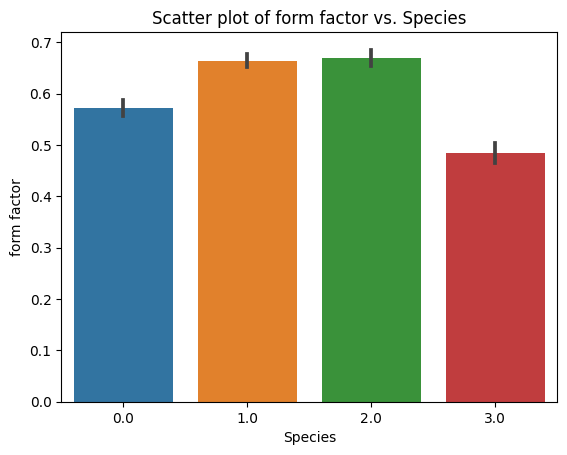

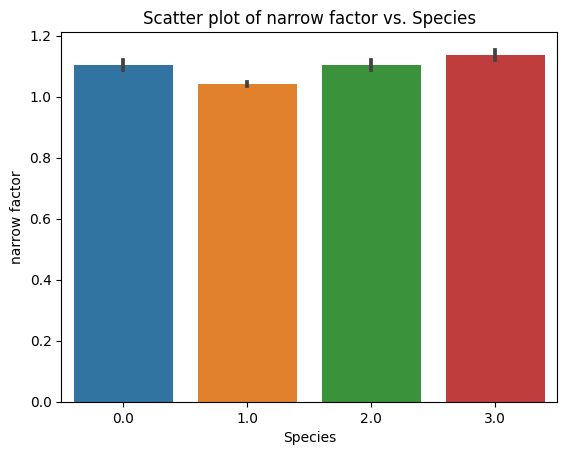

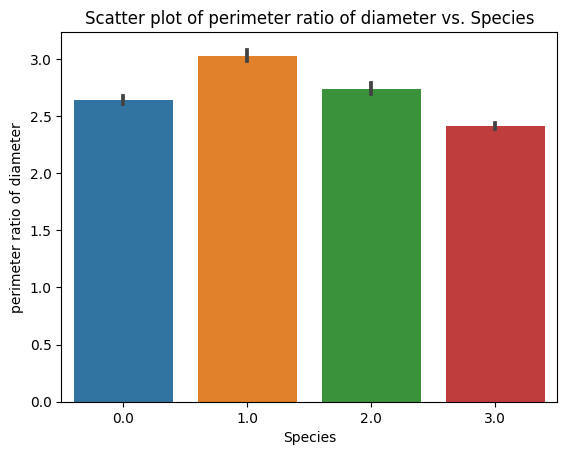

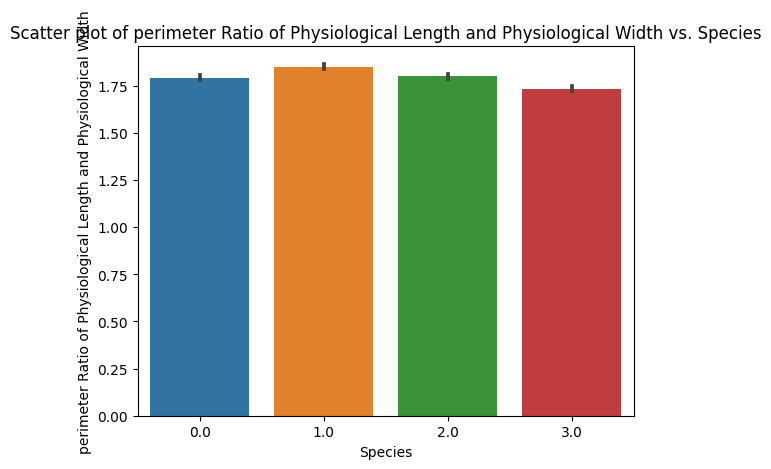

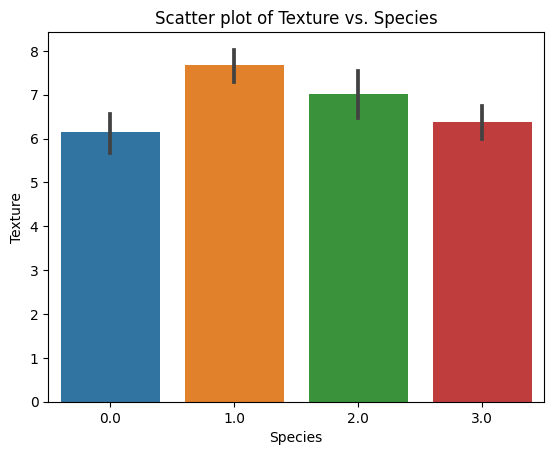

Dependent variables sorted by impact on the independent variable:
perimeter Ratio of Physiological Length and Physiological Width    1.074512
perimeter ratio of diameter                                        1.026926
aspect ratio                                                       0.602177
rectangularity                                                     0.289939
circularity                                                        0.289311
form factor                                                        0.289311
ellipticity                                                        0.058100
Texture                                                            0.033504
diameter                                                           0.013352
width                                                              0.006892
perimeter                                                          0.006293
narrow factor                                                      0.005500
length                

In [8]:
image = None
texture = None
file_path = '../../csv/features_data-Sheet1.csv'

corr(file_path)